PyImageJ Tutorial
===

This notebook covers how to use ImageJ as a library from Python. A major advantage of this approach is the ability to combine ImageJ with other tools available from the Python software ecosystem, including NumPy, SciPy, scikit-image, CellProfiler, OpenCV, ITK and more.

This notebook assumes familiarity with the ImageJ API. Detailed tutorials in that regard can be found in the other notebooks.

## 2 A simple example: `ij.py.show()` and `ij.ui().show()`

ImageJ can display numpy images using `ij.py.show`. Let's demonstrate using `scikit-image` to grab a sample.

First initialize PyImageJ:

In [13]:
import imagej

# initialize ImageJ in interactive mode
ij = imagej.init(mode='interactive')
print(f"ImageJ version: {ij.getVersion()}")

ImageJ version: 2.3.0/Inactive


Now we can import `skimage` and `numpy` to obtain an image as a numpy array and display it with `ij.py.show()`:

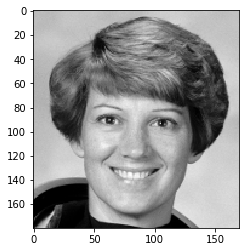

In [14]:
import skimage
import numpy as np
img = skimage.data.astronaut()
img = np.mean(img[10:190,140:310], axis=2)
ij.py.show(img, cmap = 'gray')

You can also display ImageJ images with `ij.py.show()`. Please note however this only works for simple 2D images (x, y).

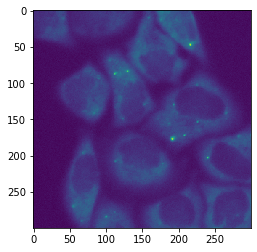

In [15]:
dataset = ij.io().open('sample-data/test_still.tif')
ij.py.show(dataset)

When working with ImageJ images (_i.e._ `Dataset`, `ImagePlus`, `ImgPlus`) and in `mode='interactive'` you can display images inside ImageJ with `ij.ui().show()`.

In [17]:
# only works with 'interactive' or 'gui' mode
# only works locally w/ Jupyter notebooks

ij.ui().show(dataset)